<a href="https://colab.research.google.com/github/BlackCaveCatt/RPI-AI-TestComputerVision/blob/main/Copy_of_testing_vision_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, import some libraries that you'll need:

*   `tensorfolow` does the actual machine learning and image recognition work
*   `os` accesses the operating system, to work with the stored image file
*   `maplotlib.pyplot` displays the image in the Colab notebook
*   `numpy` is used to help convert the image into numbers for the model to read



In [39]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

The `get_image_from_url` function below takes a URL, fetches the image at it, and stores it in a file.
It then returns the path to the file. This lets you take an image from the internet and turn it into a local file you can give to your model.

It will fail if the image at the URL cannot be read by a machine. Wikipedia images are a good way to avoid this, as is uploading images to your Google Drive.

In [40]:
def get_image_from_url(image_url):
  # If the temporary test_image.jpg file already exists,
  # delete it so a new one can be made.
  if os.path.exists('/home/pi/.keras/datasets/test_image.jpg'):
    os.remove('/home/pi/.keras/datasets/test_image.jpg')

  image_path = tf.keras.utils.get_file('test_image.jpg', origin=image_url)
  return image_path

The `print_classifications` function takes a list of predictions, looks up the labels for them,
then prints the labels and the weight the model has given to that label. It will save you some work later.

In [41]:
def print_classifications(classifications):
    for (classification, number) in zip(classifications[0], range(1, len(classifications[0])+1)):
      print('{}. {} {:.2f}%'.format(number, classification[1], classification[2]*100))

Load the model that will identify your images:

In [42]:
model = tf.keras.applications.VGG16()

Create a function to make predictions about what an image shows:

In [43]:
def classify_image(image_url):
  # Fetch the image from the URL
  image_path = get_image_from_url(image_url)
  # Prepare the image for use by the model
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

  plt.figure()
  plt.imshow(image)
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.expand_dims(image, axis=0)
  classification_result = model.predict(image, batch_size=1)
  print_classifications(classification_result)
  return classification_result



In [44]:
def print_classifications(classifications):
    if isinstance(classifications, np.ndarray):
        classifications = classifications.tolist()  # Convert NumPy array to list if needed
    for (classification, number) in zip(classifications[0], range(1, len(classifications[0])+1)):
        if isinstance(classification, list) and len(classification) >= 3:  # Check if classification is a list with enough elements
            print('{}. {} {:.2f}%'.format(number, classification[1], classification[2]*100))
        else:
            print(f"Unexpected classification format at position {number}: {classification}")

Call the prediction function:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
Unexpected classification format at position 1: 8.308676342494437e-07
Unexpected classification format at position 2: 1.5897558114374988e-07
Unexpected classification format at position 3: 5.764524644291669e-07
Unexpected classification format at position 4: 7.677882081225107e-07
Unexpected classification format at position 5: 7.583747446915368e-06
Unexpected classification format at position 6: 2.0072913287094707e-07
Unexpected classification format at position 7: 1.9027193332021852e-07
Unexpected classification format at position 8: 8.288570825243369e-06
Unexpected classification format at position 9: 3.1895431220618775e-06
Unexpected classification format at position 10: 2.546921678003855e-05
Unexpected classification format at position 11: 3.5456892533147766e-08
Unexpected classification format at position 12: 4.513064197908534e-07
Unexpected classification format at position 13: 4.6321238755808736e-07
Unexpected classification format at posit

array([[8.30867634e-07, 1.58975581e-07, 5.76452464e-07, 7.67788208e-07,
        7.58374745e-06, 2.00729133e-07, 1.90271933e-07, 8.28857083e-06,
        3.18954312e-06, 2.54692168e-05, 3.54568925e-08, 4.51306420e-07,
        4.63212388e-07, 2.39971598e-07, 9.46773639e-07, 2.89940476e-06,
        3.24005828e-06, 1.16451258e-04, 2.13599174e-06, 9.39593008e-07,
        3.84553488e-07, 4.52894398e-07, 5.19965191e-08, 8.46844671e-07,
        4.83926328e-07, 7.74758178e-07, 2.60211806e-07, 2.35223979e-07,
        6.27584654e-07, 2.29332500e-06, 3.61866967e-07, 3.96213750e-07,
        2.20040249e-07, 4.92785716e-07, 4.25922963e-07, 1.92344316e-07,
        4.22616893e-07, 5.58027807e-07, 1.82997042e-07, 1.78908954e-06,
        3.51265385e-07, 3.76838358e-07, 4.46935076e-07, 8.73105463e-08,
        7.33059153e-07, 2.25886936e-07, 1.32871457e-06, 9.64716662e-08,
        1.60706634e-07, 2.01931948e-06, 3.20222807e-06, 5.11744076e-07,
        1.11180259e-06, 3.91237506e-07, 7.72912472e-07, 5.753051

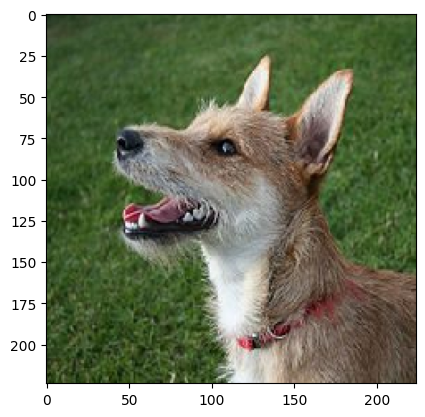

In [46]:
classify_image('https://dojo.soy/predict-dog')
